<a href="https://colab.research.google.com/github/Zoz171/NTI-DataScience-Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
- [x] Find a dataset (🎮 Video Game Review and Ratings) ✅
- [x] SQL Server<font color='#f83e3e'>-less</font> Integeration (<font color='#00f800'>**neon.tech**</font>) ✅
- [x] Data Scientist Lifecycle
  - [x] Problem Definition ✅
  - [x] Data Gathering ✅
  - [x] Understanding Data ✅
  - [x] Data Cleaning and Preparation [ **ALREADY CLEANED AND PREPARED** ] ✅
  - [x] Feature Engineering <font color='#0093cb'>**IMPORTANT** (6+ features, but we made 4, good enough)</font> ✅
  - [x] EDA **[ *Analyze -> Visualize -> Gain insights -> identify patterns* ]** ↔️
    - [x] Sentiment Analysis ✅
  - [x] Modeling ✅
    - [x] Data Prepration for modeling (Preprocessing) ✅
    - [x] Model Selection ✅
    - [x] Model training ✅
    - [x] Model Evaluation ✅
    - [x] Deployment ✅
- [ ] Streamlit App <font color='#0093cb'>**IMPORTANT**</font> ↔️
  - [ ] Make sure that model.joblib is used in the app ↔️
- [x] Upload to github ✅
  - [x] Environment Setup ✅

# -- **START** --

# 1. Problem Definition

The objective of this project is to develop a predictive model that can accurately estimate the user rating of a video game based on its various features.<br> By analyzing characteristics such as price, platform, genre, multiplayer capabilities, game length, graphics, soundtrack, story quality, and other relevant attributes, we aim to build a robust model that can provide insights into what factors influence user satisfaction and predict potential ratings for new or existing games.<br> This can be valuable for game developers, publishers, and players in understanding the potential reception of a game.

### Necessary tools

In [ ]:
!pip install psycopg2-binary asyncpg python-dotenv
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 107.8 MB/s eta 0:00:00


### Imports

In [ ]:
import os
import psycopg2
from dotenv import load_dotenv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# 2. Data Gathering
- We uploaded our data into an SQL server(-less) called <font color='#7cf87c'>neon.tech</font>, for simulating Data gathering interactions.
- It enabled us to put our hands into real world scenarios, by reading and manipulating data and databases from real vendors/servers.
- <font color='#7cf87c'>neon.tech</font> offers **Postgre SQL** for handling sql queries.

<br> We used ***psycopg2***  SQL Driver for reading data from the server.

In [ ]:
load_dotenv('/content/env/psql.env')

conn_string = os.getenv("DATABASE_URL")
conn = psycopg2.connect(conn_string)
conn

<connection object at 0x7e2c3f7f34c0; dsn: 'user=neondb_owner password=xxx channel_binding=require dbname=neondb host=ep-gentle-bread-a2merkeb-pooler.eu-central-1.aws.neon.tech sslmode=require', closed: 0>

In [ ]:
conn.rollback()
cur = conn.cursor()
query = 'SELECT * FROM \"VideoGames_Capstone_Database\";'
cur.execute(query)
# cur.fetchall()

- We read everything from the server and put 'em into a pandas DataFrame.

In [ ]:
df = pd.read_sql(query, conn)
df.head()

/tmp/ipython-input-6-1821051113.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Game Title,User Rating,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


# 3. Understanding Data

#### **Game Title:**
From FIFA 24 to Tetris, you’ll find a wide range of titles, genres, and franchises.

#### **User Rating:** <font color='#0093cb'>**<= Our Target**</font>
Gamers have spoken—what's the verdict on these games? Ratings from 0 to 50!
#### **Age Group Targeted:**
Who is the game designed for—Kids, Teens, Adults, or All Ages?

#### **Platform:**
Play it on your PC, PlayStation, Xbox, or Nintendo Switch—we’ve got all the platforms covered!

#### **Price:**
The price tag could make or break a deal. What’s the price of your favorite game?

#### **Game Mode (Online/Offline)**:
Does your game require a special device? Is it multiplayer? Time to find out!

#### **Review Text:**
Want to know what people are saying? Dive into real user feedback and discover the highs and lows of gaming experiences.

#### **Requires Special Device:**
Whether the game requires special hardware or accessories (e.g., Yes for VR or motion controls, No for standard play).

In [ ]:
df.shape

(47774, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   price                    47774 non-null  float64
 4   platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   developer                47774 non-null  object 
 7   publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   genre                    47774 non-null  object 
 10  multiplayer              47774 non-null  object 
 11  Game Length Hours        47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [ ]:
df.describe()

,User Rating,price,Release Year,Game Length Hours,Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


In [ ]:
df.isna().sum()

,0
Game Title,0
User Rating,0
Age Group Targeted,0
price,0
platform,0
Requires Special Device,0
developer,0
publisher,0
Release Year,0
genre,0


# 4. Data Cleaning and Prepration (Handling Outliers)

As we noticed with ***df.describe()*** and ***df.isna().sum()***, no potential missing values or outliers in this dataset.

# 5. Features Engineering
Only Features that we came up with are:
- **Overall Quality:** Combines the three qualities into one overall quality label.
- **Review Sentiment:** Converting ***Review User Text*** column into meanigful numbers (polarity) that indicatates postivity of a given text.
- **Sentiment Category:** just **Review Sentiment** scores decoded into labels.
- **Game's Value:** some users calculates whether a game offers good hourtime for it's price (price/Game Hour Length) <font color='#f83e3e'>**[DISCARDED]**</font>

In [ ]:
print(df['Soundtrack Quality'].unique())
print(df['Story Quality'].unique())
print(df['Graphics Quality'].unique())

['Average' 'Poor' 'Good' 'Excellent']
['Poor' 'Average' 'Excellent' 'Good']
['Medium' 'Low' 'High' 'Ultra']


In [ ]:
def labeling(row):
  dict_ = {
    0: 'Poor',
    1: 'Average',
    2: 'Good',
    3: 'Excellent',
  }
  # print(math.floor(row))
  return dict_.get(math.ceil(row), 0)

sound_and_story_dict = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3,
}

graphics_dict = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}

df_copy = df.copy()

# Combines 3 columns of quality into one "Overall" quality column, each quality represents a score from 0 - 3 and calculated to compute "overall" quality.
df_copy['Overall Quality'] = (( df_copy['Graphics Quality'].map(graphics_dict) + df_copy['Soundtrack Quality'].map(sound_and_story_dict) + df_copy['Story Quality'].map(sound_and_story_dict) ) / 3).apply(labeling)

## 5.1. Sentiment Analysis
- We could use **TF-IDF** for measuring the importance of a word and a score system to identify whether a review is positive or negative, but this may introduce a little overhead.

- Instead, We used **TextBlob()** library to compute and process the (polarity) of text, **TextBlob** is a part of NLP toolkit.
  - Range:
The polarity score is a floating-point number that ranges from -1.0 to +1.0.
Interpretation:

    - -1.0: Represents the most negative sentiment.
    - +1.0: Represents the most positive sentiment.
    - 0.0: Represents a neutral sentiment.

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0.0 # Return 0 for non-string values. just in case.

# Apply sentiment analysis to the original DataFrame copy
df_copy['Review_Sentiment'] = df_copy['User Review Text'].apply(get_sentiment_polarity)

In [ ]:
df_copy.head()

,Game Title,User Rating,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Overall Quality,Review_Sentiment
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1,Average,0.033333
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3,Poor,0.033333
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5,Average,0.300000
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4,Good,0.033333
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1,Good,0.300000


# 6. EDA

### Distribution of User Ratings. <br>
As we said earlier there is no outliers, data is almost **symmetric**.

<Axes: xlabel='User Rating', ylabel='Count'>

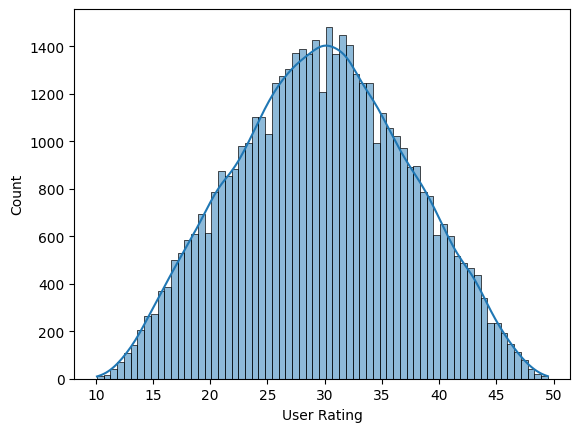

In [ ]:
sns.histplot(data=df, x='User Rating', kde=True)

### User ratings in relation to Game's price.
Somehow there is a linear relationship between both.

<Axes: xlabel='User Rating', ylabel='price'>

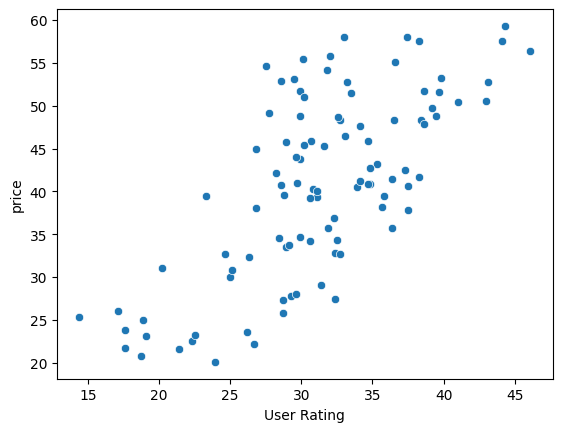

In [ ]:
sns.scatterplot(data=df_copy[:100], x='User Rating', y='price')

## Popular Genres for an Age Group.

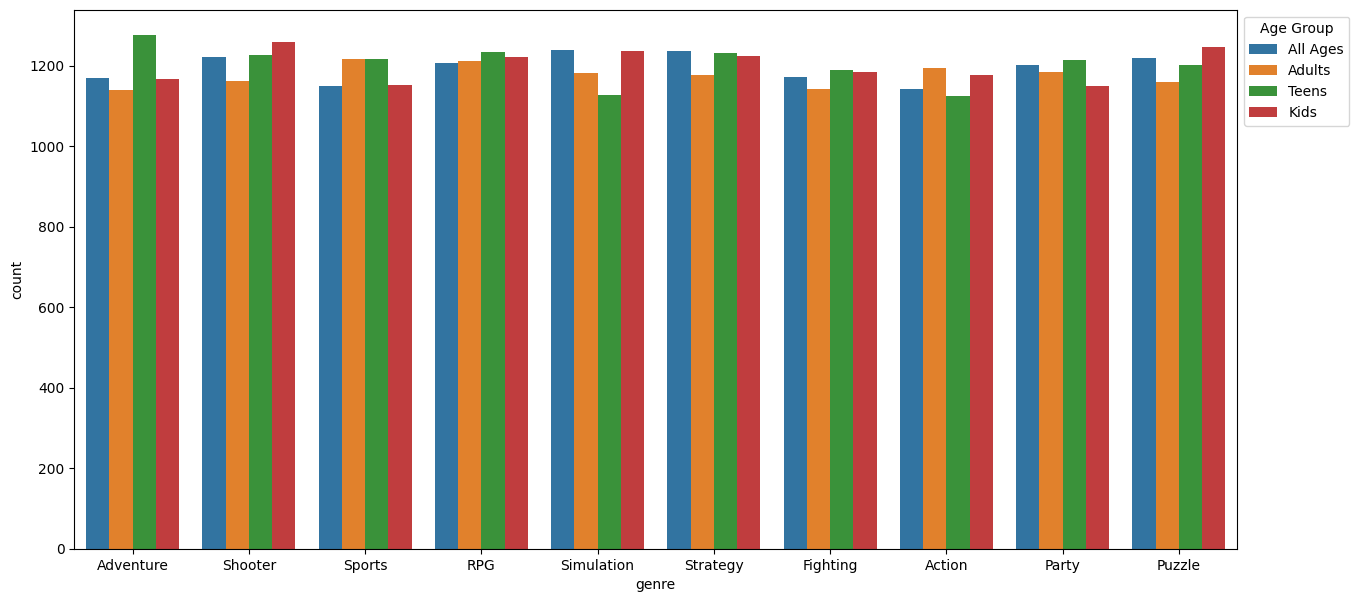

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_copy, x='genre', hue='Age Group Targeted')
plt.legend(title = "Age Group", loc = "upper left", bbox_to_anchor = (1,1))
plt.show()

## Distribution of Games by Platform

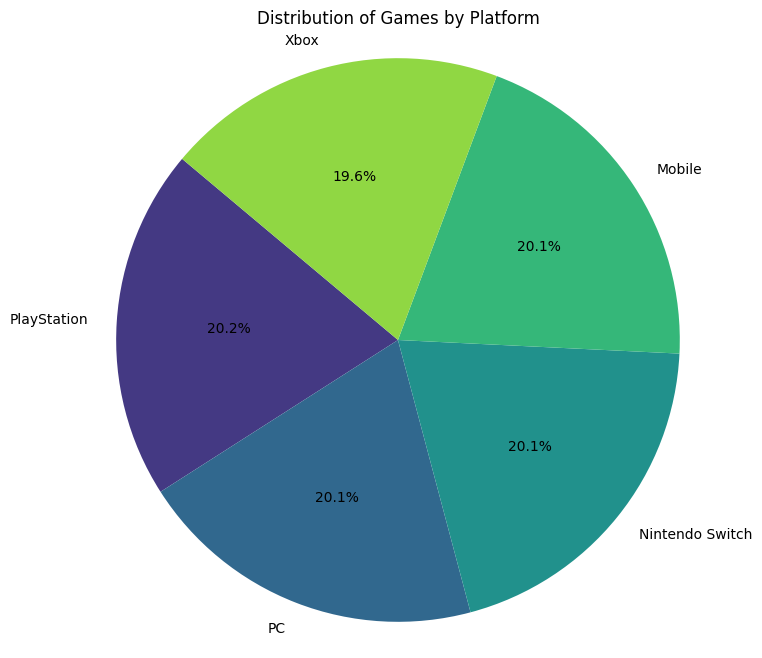

In [ ]:
# Calculate the counts for each platform
platform_counts = df_copy['platform'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(platform_counts)))
plt.title('Distribution of Games by Platform')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Who is the most popular Developer?

The most popular developer is: Bungie


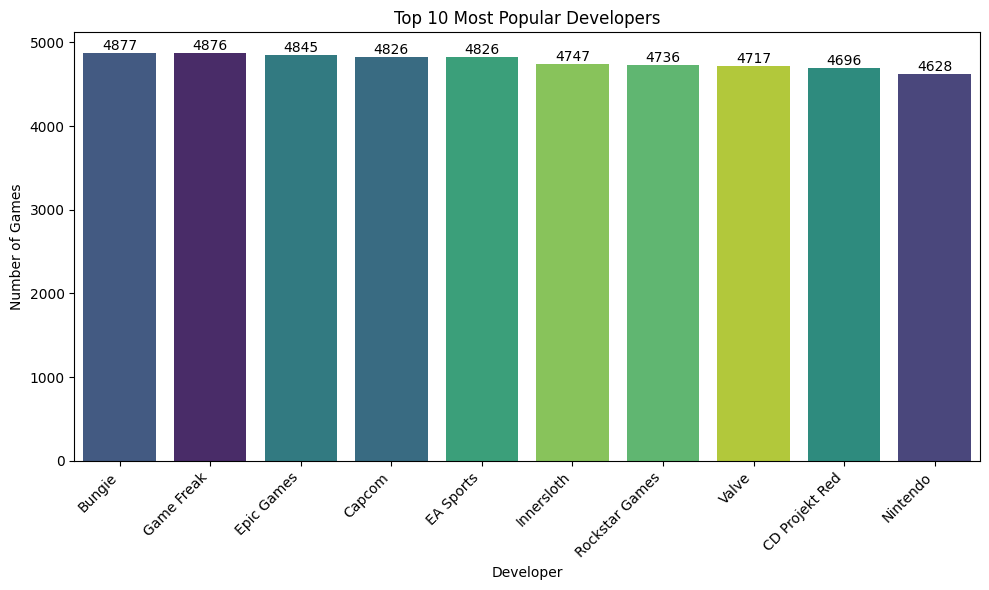

In [ ]:
# Get the most popular developer
most_popular_developer = df_copy['developer'].value_counts().nlargest(1).index[0]
print(f"The most popular developer is: {most_popular_developer}")

# Filter the DataFrame for games by the most popular developer
developer_games = df_copy[df_copy['developer'] == most_popular_developer]

# Sort the games by user rating in descending order and select the top N (e.g., top 10)
top_n_rated_games = developer_games.sort_values(by='User Rating', ascending=False).head(10)

# Plot the most popular developer (Vertical with values)
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(data=df_copy, x='developer', order=df_copy['developer'].value_counts().index[:10], hue='developer', palette='viridis', legend=False)
plt.title('Top 10 Most Popular Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add values on top of bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

## How well is their games rated?

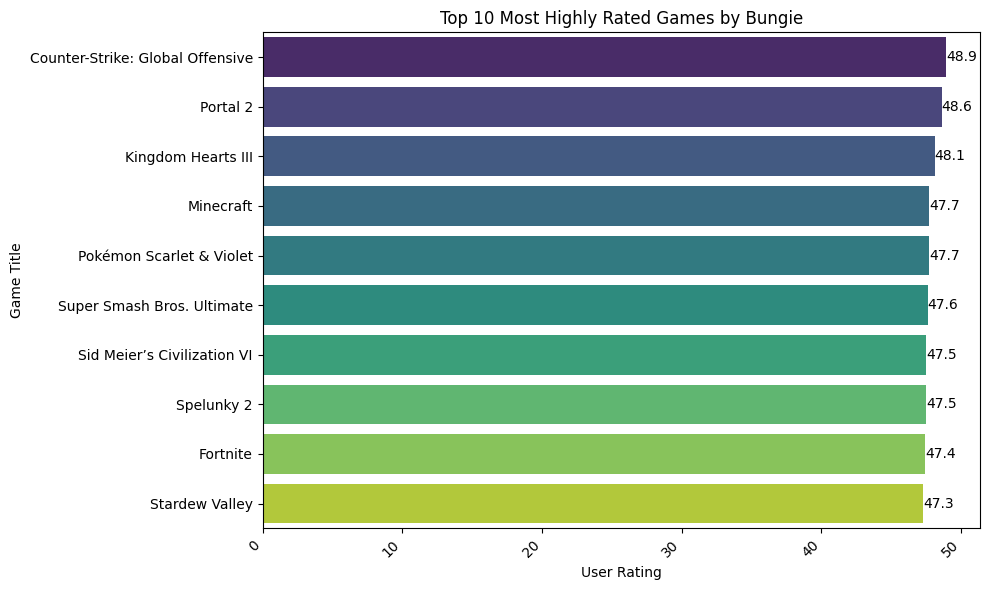

In [ ]:
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=top_n_rated_games, x='User Rating', y='Game Title', hue='Game Title', palette='viridis', legend=False)
plt.title(f'Top 10 Most Highly Rated Games by {most_popular_developer}')
plt.xlabel('User Rating')
plt.ylabel('Game Title')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Add values on top of bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f') # Format to 1 decimal place for ratings

plt.tight_layout()
plt.show()

In [ ]:
df_copy['Review_Sentiment'].value_counts()

,count
Review_Sentiment,
0.300000,8044
-0.166667,7981
0.033333,7955
0.233333,7901
-0.133333,4020
0.066667,3996
0.266667,3939
0.333333,3938


## Average Review Sentiment by Genre

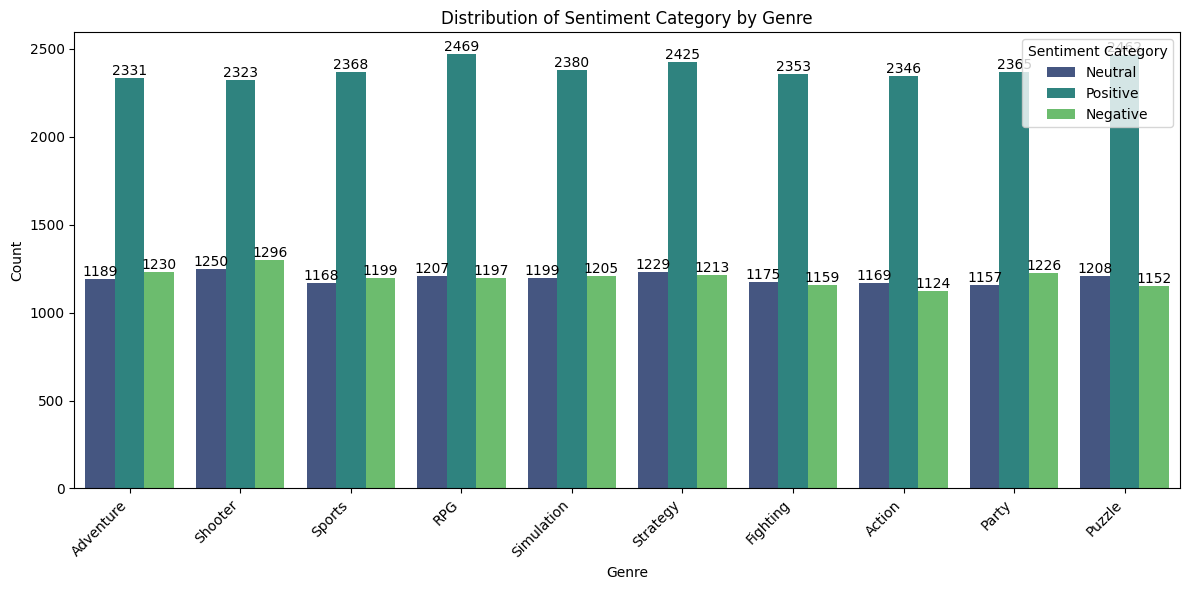

In [ ]:
# Categorize Review Sentiment
def categorize_sentiment(score):
    if score >= 0.1 and score <= 0.5:
        return 'Positive'
    elif score >= 0 and score <= 0.09:
        return 'Neutral'
    else:
        return 'Negative'

df_copy['Sentiment_Category'] = df_copy['Review_Sentiment'].apply(categorize_sentiment)

# Create the count plot for Genre with Sentiment Category as hue
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_copy, x='genre', hue='Sentiment_Category', palette='viridis')
plt.title('Distribution of Sentiment Category by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Category')
plt.tight_layout()

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

## Average Review Sentiment by Platform

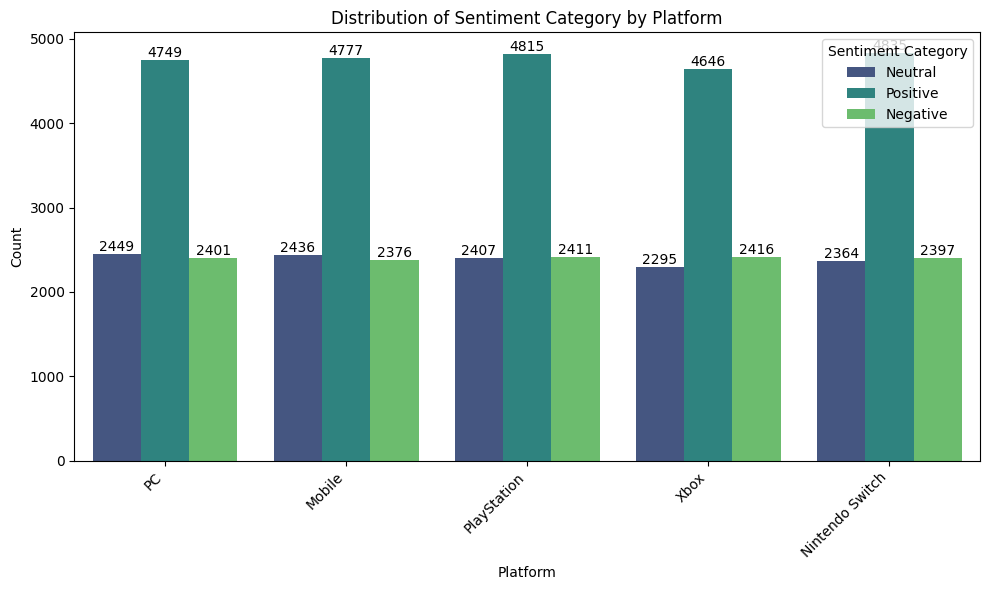

In [ ]:
# Categorize Review Sentiment (assuming this was run in the previous cell)
# def categorize_sentiment(score):
#     if score >= 0.1 and score <= 0.5:
#         return 'Positive'
#     elif score >= 0 and score <= 0.09:
#         return 'Neutral'
#     else:
#         return 'Negative'

# df_copy['Sentiment_Category'] = df_copy['Review_Sentiment'].apply(categorize_sentiment)

# Create the count plot for Platform with Sentiment Category as hue
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_copy, x='platform', hue='Sentiment_Category', palette='viridis')
plt.title('Distribution of Sentiment Category by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Category')
plt.tight_layout()

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

## Average Review Sentiment by Developer (Top 10)

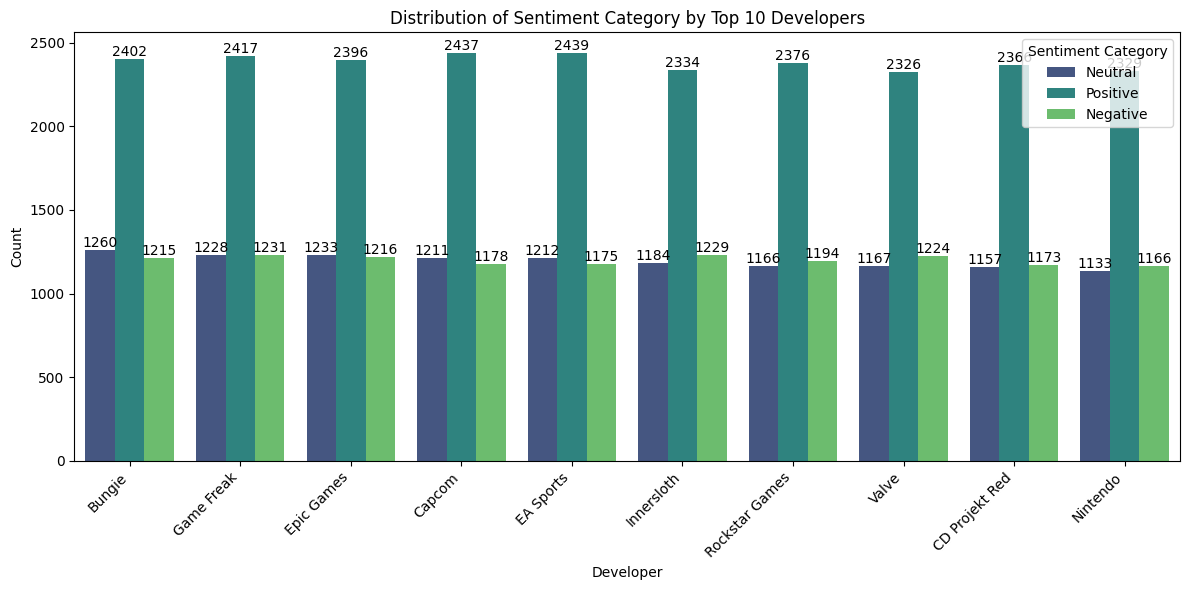

In [ ]:
# Calculate the counts for each developer and select the top 10
top_10_developers = df_copy['developer'].value_counts().nlargest(10).index.tolist()
df_top_developers = df_copy[df_copy['developer'].isin(top_10_developers)].copy()

# Create the count plot for Top 10 Developers with Sentiment Category as hue
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_top_developers, x='developer', hue='Sentiment_Category', palette='viridis', order=top_10_developers)
plt.title('Distribution of Sentiment Category by Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Category')
plt.tight_layout()

# Add values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

In [ ]:
df_copy['Game Title'].unique()

array(['Grand Theft Auto V', 'The Sims 4', 'Minecraft',
       'Bioshock Infinite', 'Half-Life: Alyx',
       'Sid Meier’s Civilization VI', 'Just Dance 2024',
       '1000-Piece Puzzle', 'Spelunky 2', 'Street Fighter V', 'Fall Guys',
       'Rocket League', 'The Elder Scrolls V: Skyrim', 'Among Us',
       'Stardew Valley', 'Call of Duty: Modern Warfare 2',
       'The Legend of Zelda: Breath of the Wild', 'Tekken 7',
       'Pillars of Eternity II: Deadfire',
       'Animal Crossing: New Horizons', 'Hades', 'Mario Kart 8 Deluxe',
       'Overwatch 2', 'Fortnite', 'Pokémon Scarlet & Violet', 'Hitman 3',
       'Tomb Raider (2013)', 'Halo Infinite',
       'Super Smash Bros. Ultimate', 'Kingdom Hearts III',
       'League of Legends', 'The Witcher 3: Wild Hunt', 'FIFA 24',
       'Ghost of Tsushima', 'Cuphead', 'Red Dead Redemption 2',
       'Portal 2', 'Tetris', 'Counter-Strike: Global Offensive',
       'Super Mario Odyssey'], dtype=object)

## Finding patterns between **User Ratings** and every other column
Visualizing the relationship between 'User Rating' and the categorical features 'Platform', 'Age Group Targeted', 'Genre', 'Multiplayer', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode', and 'Overall Quality' using bar plots.

In [ ]:
categorical_features = [
    'platform',
    'Age Group Targeted',
    'genre',
    'multiplayer',
    'Graphics Quality',
    'Soundtrack Quality',
    'Story Quality',
    'Game Mode',
    'Overall Quality'
]

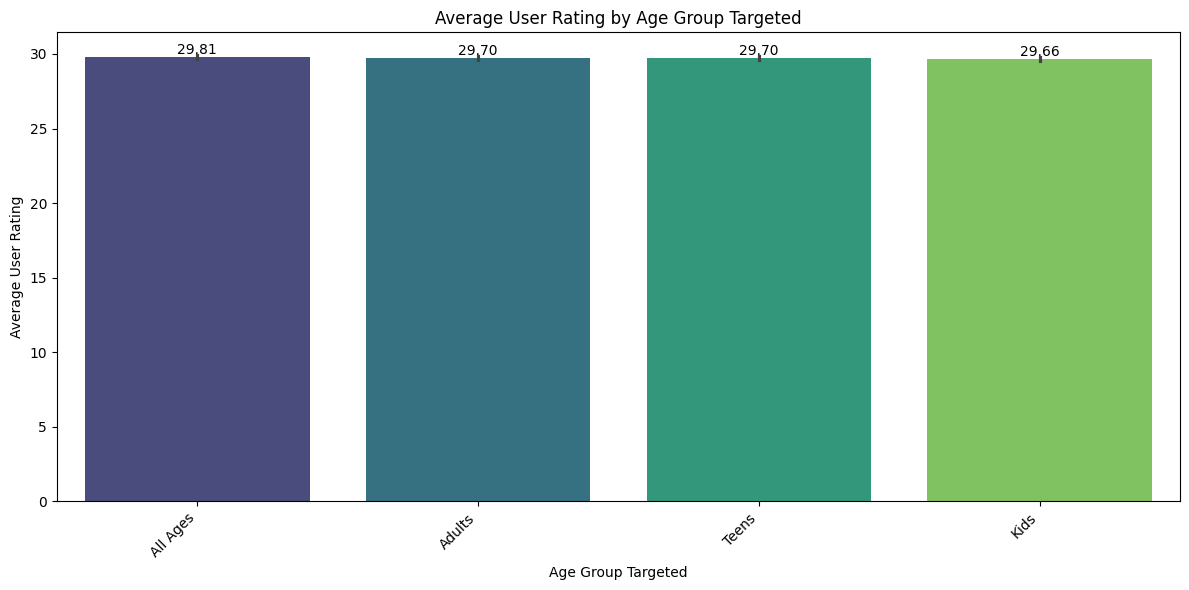

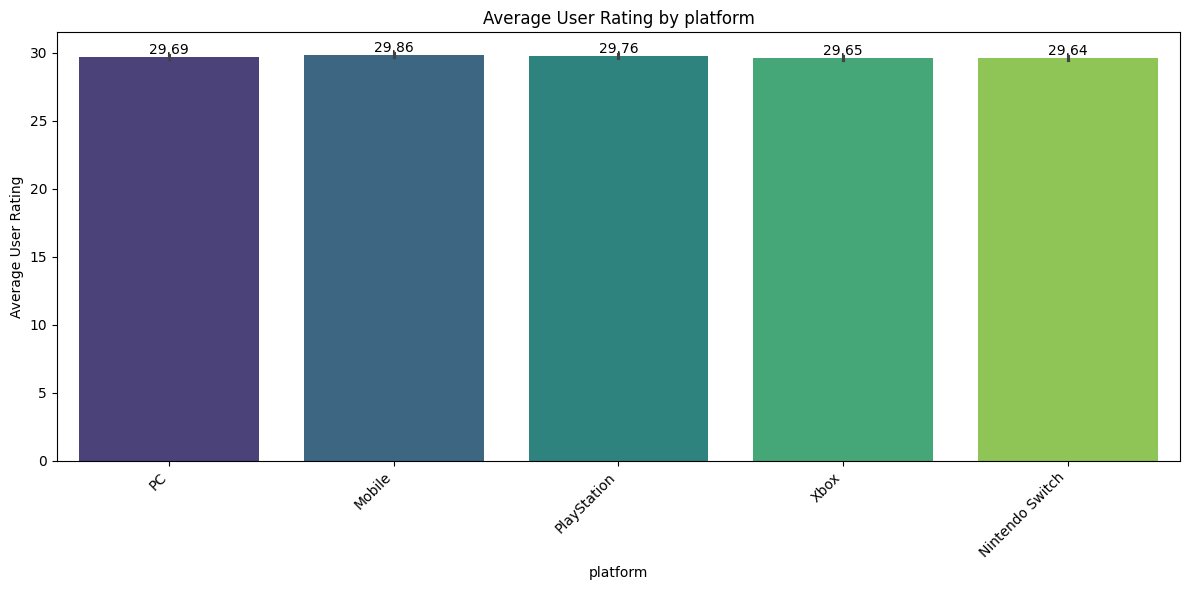

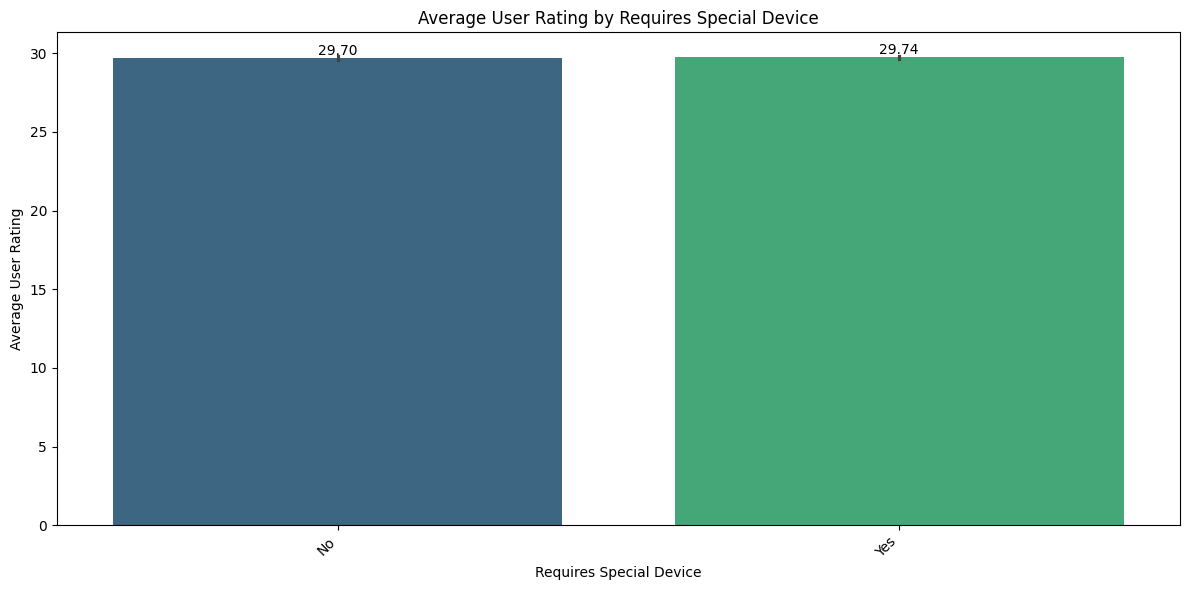

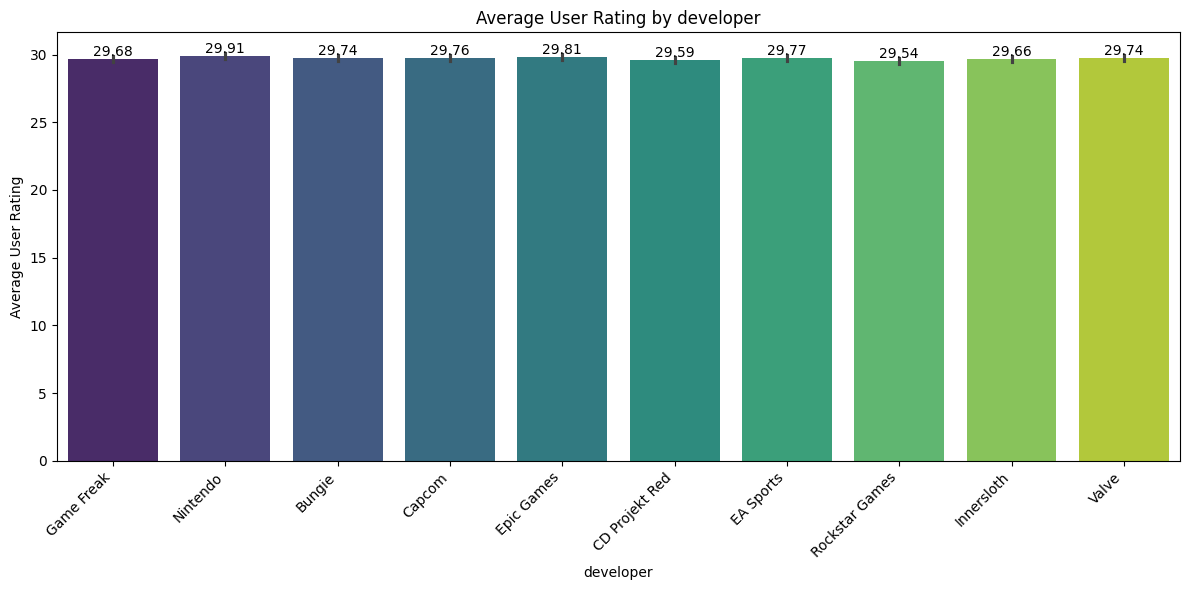

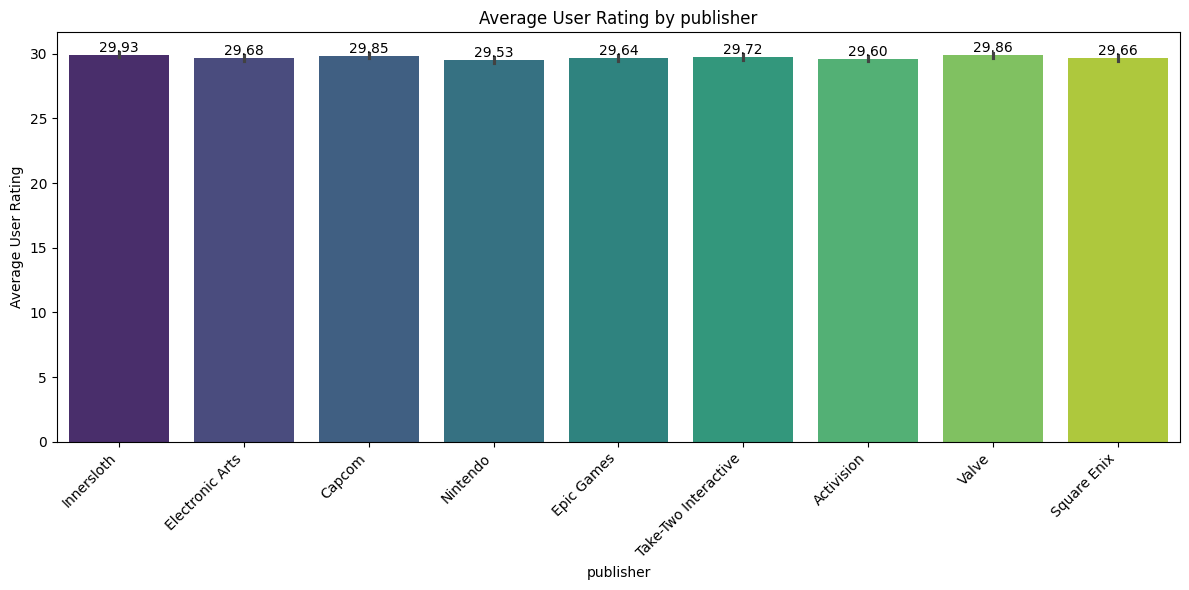

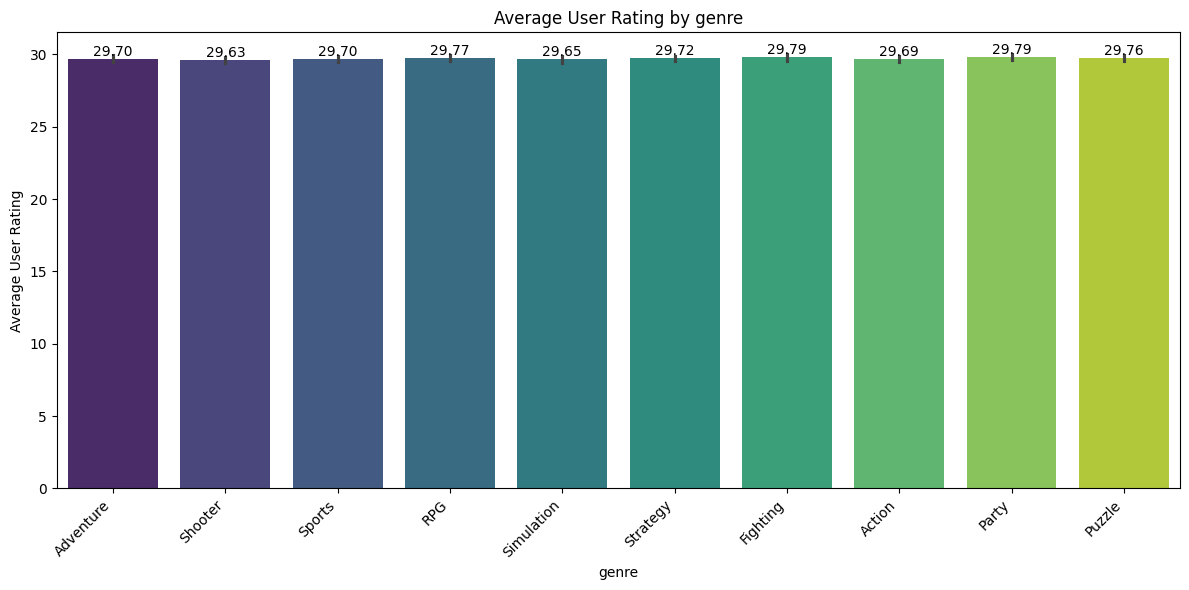

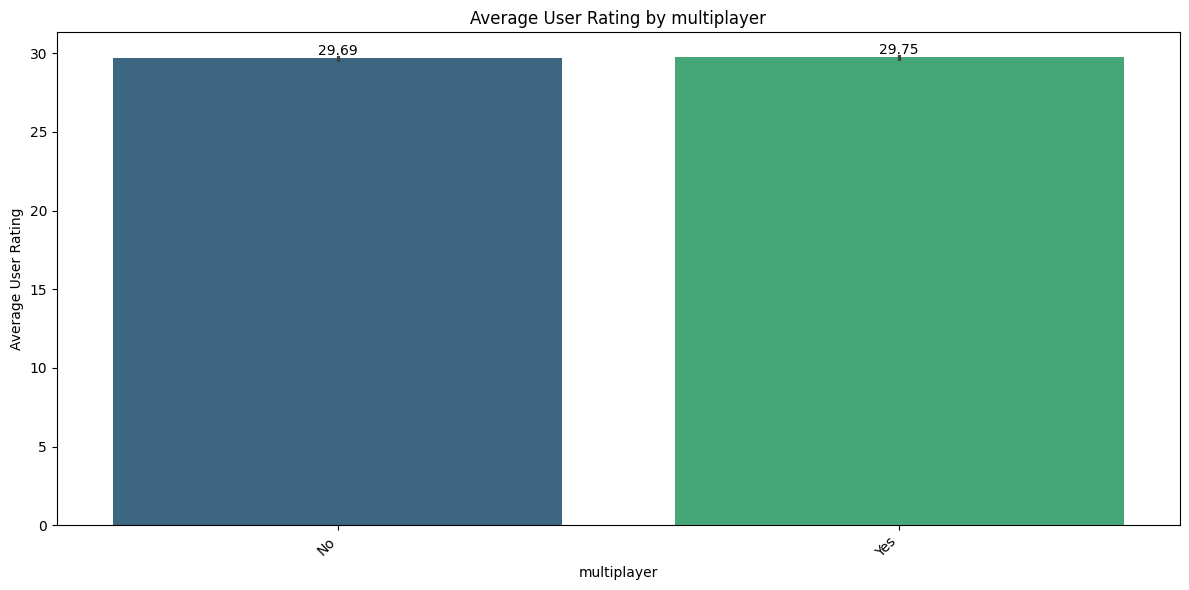

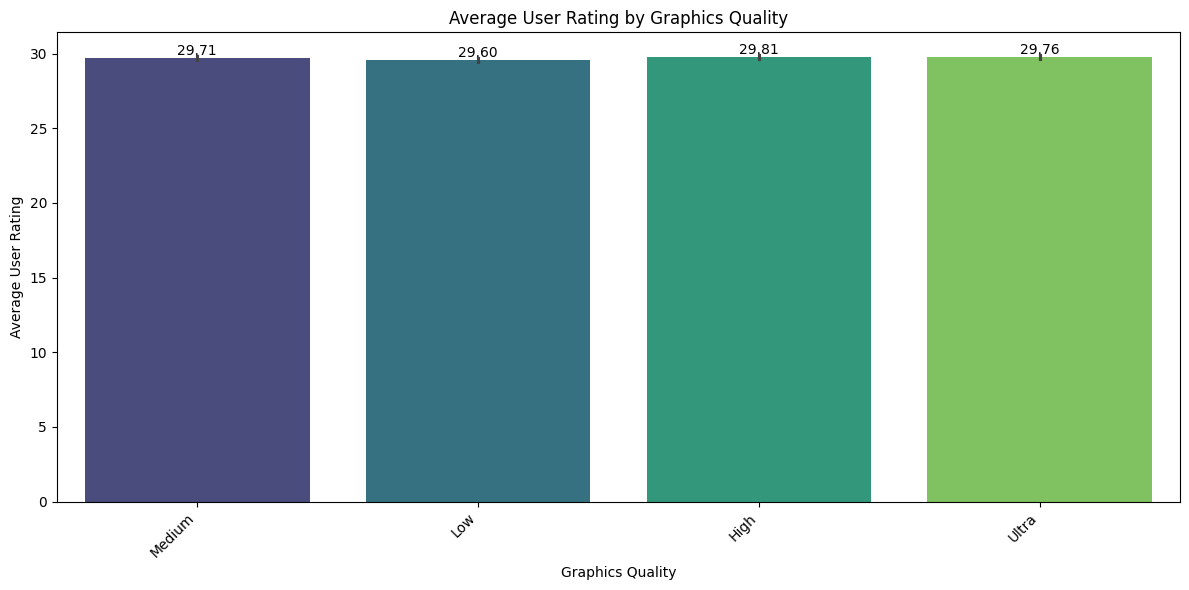

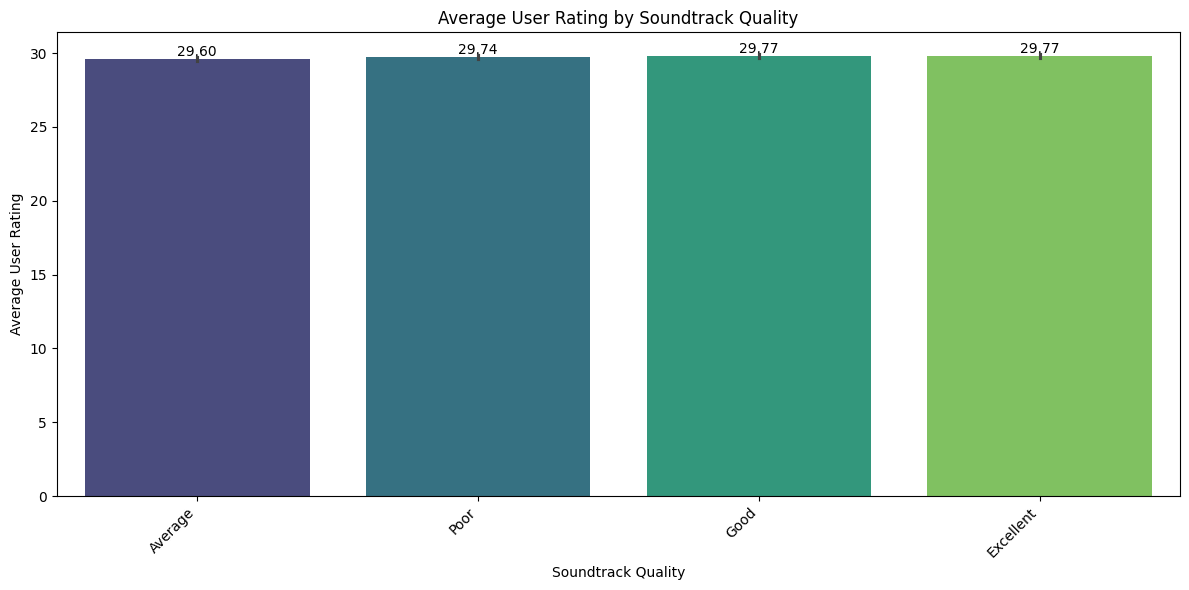

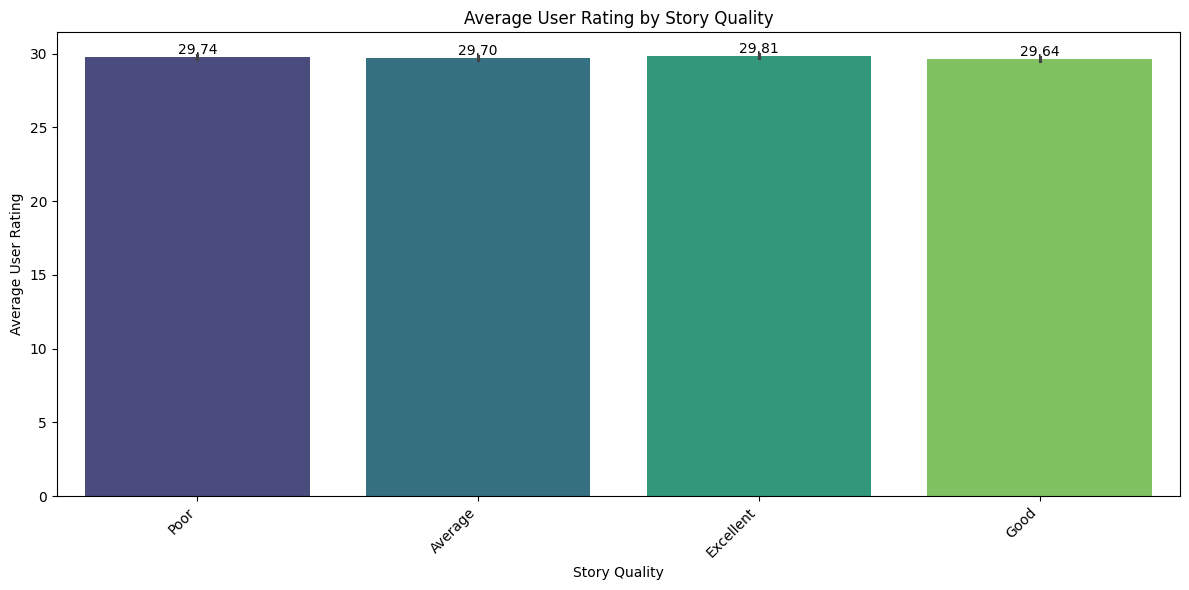

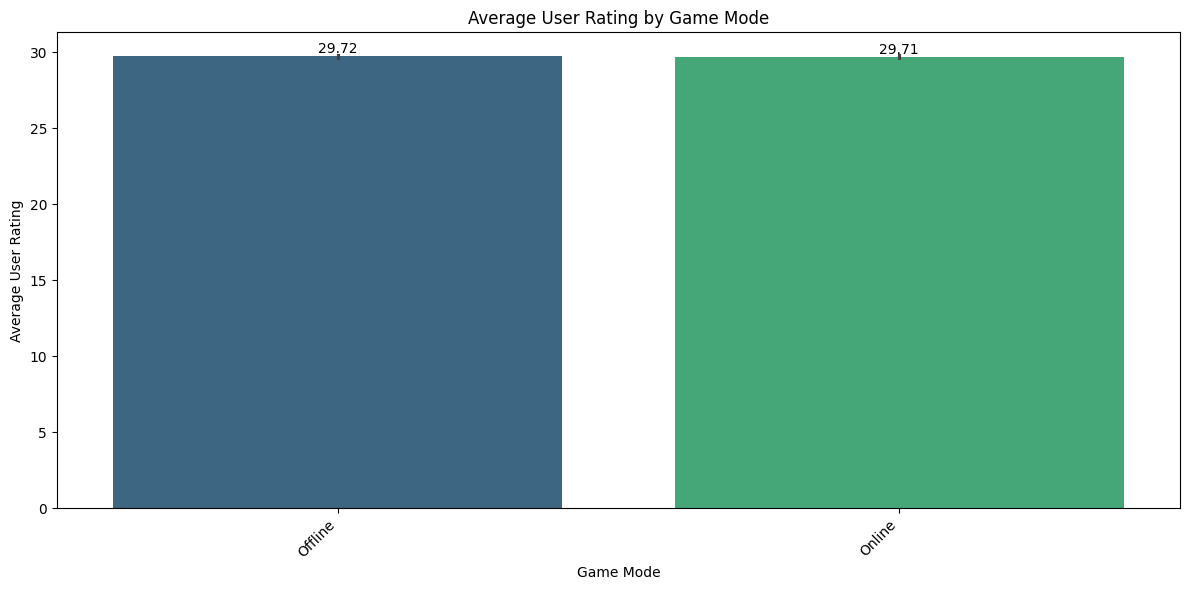

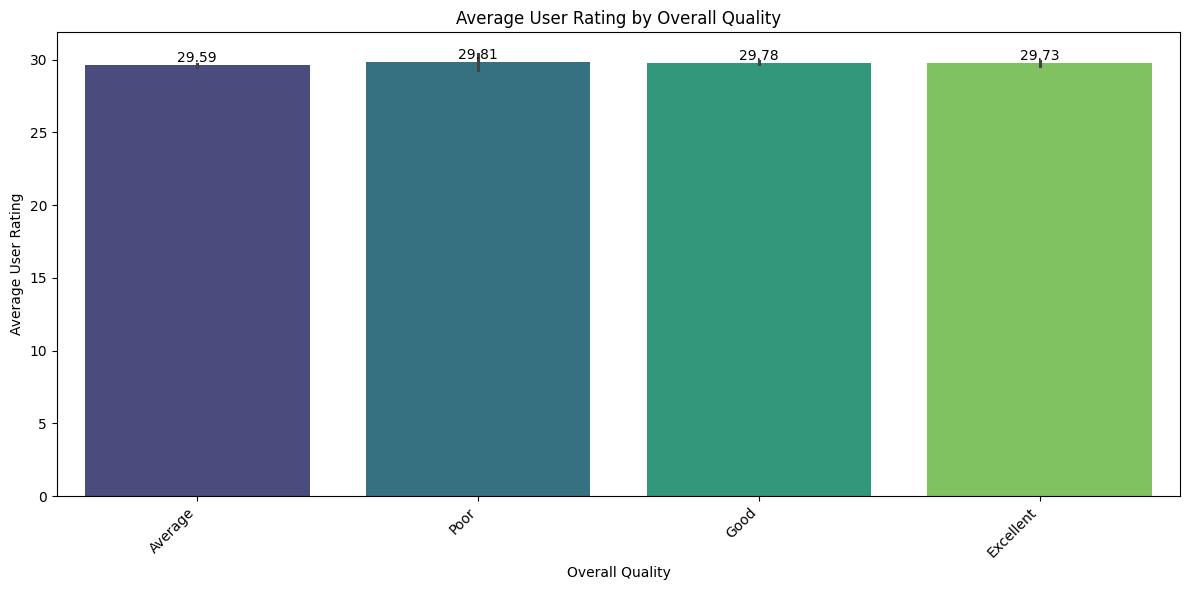

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_copy, x=feature, y='User Rating', hue=feature, palette='viridis', legend=False)
    plt.title(f'Average User Rating by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average User Rating')
    plt.xticks(rotation=45, ha='right')

    # Display the average rating on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f') # Format to 2 decimal places

    plt.tight_layout()
    plt.show()

### Data Analysis Key Findings

*   'Overall Quality' shows a positive correlation with user ratings, with games rated 'Excellent' and 'Good' receiving slightly higher ratings.
*   Mobile platform and games targeting 'Kids' or 'All Ages' generally showed slightly higher average user ratings.
*   Sports and RPG genres, along with games featuring multiplayer, also tended to have higher average ratings.
*   Higher quality in Graphics, Soundtrack, and Story positively correlates with increased user ratings.
*   Online game mode displayed a slight positive correlation with user ratings.

Despite having very close average User Rating of every each Game's feature, The real question presists, Does these features of a Game really correlates with User Rating?

We will truly see when we start our modeling.

### Next Steps

*   The next logical step is to prepare the data for predictive modeling by encoding categorical features and selecting an appropriate regression model to build a user rating prediction system.


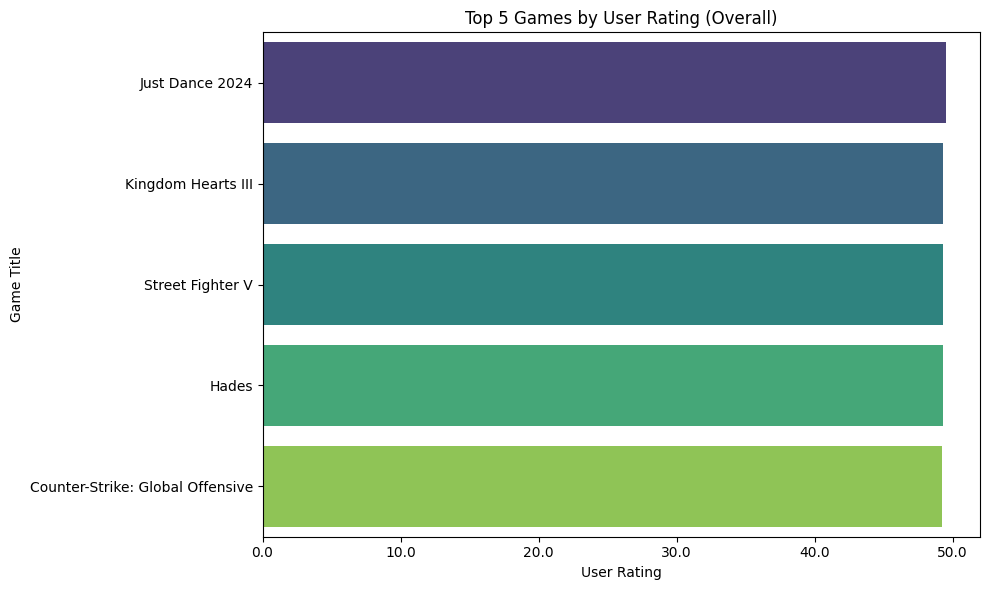

In [ ]:
# Visualize top 5 games overall
top_games = df_copy.sort_values(by='User Rating', ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_games, x='User Rating', y='Game Title', hue='Game Title', palette='viridis', legend=False)
plt.title('Top 5 Games by User Rating (Overall)')
plt.xlabel('User Rating')
plt.ylabel('Game Title')

# Set x-axis tick format to show decimal points
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f')) # Show one decimal place

plt.tight_layout()
plt.show()

### Data Analysis Key Findings

*   The top 5 games based on overall User Rating were identified as 'Just Dance 2024', '1000-Piece Puzzle', 'Street Fighter V', 'Hades', and CS-GO.



# Game Trends 📈
Visualizing the trend of User Rating over time for the top 5 games, User Ratings has a direct relationship with popularity of a game. (Certain Game updates can attract and increase number of players, hence increasing the rating of a game

**Reasoning**:
Sort the dataframe by 'User Rating' in descending order and select the top 5 rows to identify the top 5 games.



In [ ]:
top_5_games = df_copy.sort_values(by='User Rating', ascending=False).head(5)

In [ ]:
top_5_game_titles = top_games['Game Title'].tolist()
df_top_games_filtered = df_copy[df_copy['Game Title'].isin(top_5_game_titles)].copy()

# Filter for release years between 2019 and 2023
df_top_games_filtered = df_top_games_filtered[(df_top_games_filtered['Release Year'] >= 2019) & (df_top_games_filtered['Release Year'] <= 2023)].copy()

display(df_top_games_filtered.head())

,Game Title,User Rating,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Overall Quality
31,Street Fighter V,31.6,All Ages,45.25,Mobile,Yes,EA Sports,Nintendo,2021,Puzzle,Yes,27.2,High,Poor,Poor,"Disappointing game, but too many bugs.",Online,6,Average
69,Hades,23.3,Kids,39.48,PlayStation,No,Nintendo,Nintendo,2019,Puzzle,No,13.3,Ultra,Poor,Poor,"Solid game, but too many bugs.",Online,4,Average
89,Just Dance 2024,34.7,Kids,45.83,PC,Yes,Epic Games,Capcom,2020,Puzzle,Yes,40.9,Ultra,Excellent,Good,"Solid game, but the graphics could be better.",Online,6,Excellent
103,Hades,20.8,Teens,36.65,Nintendo Switch,No,Nintendo,Capcom,2022,Party,Yes,9.0,Low,Excellent,Average,"Great game, but too many bugs.",Offline,5,Good
107,Hades,38.5,Kids,43.33,Xbox,Yes,Nintendo,Innersloth,2020,Puzzle,Yes,51.5,Medium,Poor,Average,"Amazing game, but the gameplay is amazing.",Online,8,Average


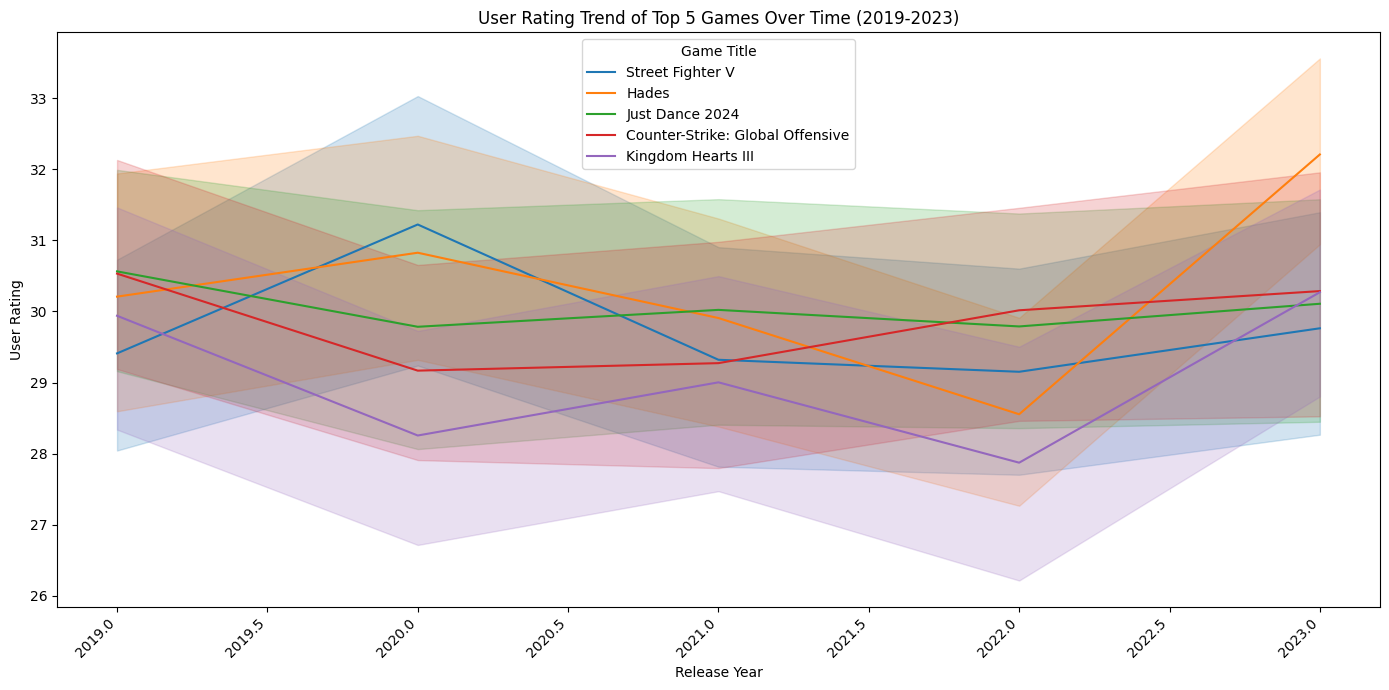

In [ ]:
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_top_games_filtered, x='Release Year', y='User Rating', hue='Game Title')
plt.title('User Rating Trend of Top 5 Games Over Time (2019-2023)')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Game Title')
plt.tight_layout()
plt.show()

# 6. Modeling


## 6.1. Data Preprocessing and Preparation


In [ ]:
# Separate target variable and features, dropping specified columns
X = df_copy.drop(['User Rating', 'Game Title', 'User Review Text', 'Sentiment_Category'], axis=1)
y = df_copy['User Rating']

print("X DataFrame after dropping columns and adding sentiment:")
display(X.head())
print("\ny Series (Target Variable):")
display(y.head())

X DataFrame after dropping columns and adding sentiment:


,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players,Overall Quality,Review_Sentiment
0,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,Offline,1,Average,0.033333
1,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,Offline,3,Poor,0.033333
2,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,Offline,5,Average,0.300000
3,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,Online,4,Good,0.033333
4,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,Offline,1,Good,0.300000



y Series (Target Variable):


,User Rating
0,36.4
1,38.3
2,26.8
3,38.4
4,30.1


Apply Label encoding and StandardScalar preprocessors.
- **StandardScaler:** Is used as our label/target is uniformly distributed with no harsh outliers.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical features based on the current X DataFrame
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to each categorical column
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le # Store the encoder if needed for inverse transformation later

print("X DataFrame after applying Label Encoding:")
display(X.head())

X DataFrame after applying Label Encoding:


,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players,Overall Quality,Review_Sentiment
0,1,41.41,2,0,5,4,2015,1,0,55.3,2,0,3,0,1,0,0.033333
1,0,57.56,2,0,7,2,2015,6,1,34.6,1,3,3,0,3,3,0.033333
2,3,44.93,2,1,0,1,2012,1,1,13.9,1,2,0,0,5,0,0.300000
3,1,48.29,0,1,5,5,2015,8,0,41.9,2,2,1,1,4,2,0.033333
4,0,55.49,3,1,5,3,2022,5,1,13.2,0,3,2,0,1,2,0.300000


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

numerical_features = X.select_dtypes(include=[np.number]).columns.tolist() # Use np.number for broader numerical types

print("Numerical features for scaling:", numerical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)],
    remainder='passthrough') # Keep other columns (which will be the Label Encoded ones)


# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = preprocessing_pipeline.fit_transform(X)

print("\nShape of processed data (X_processed):", X_processed.shape)

Numerical features for scaling: ['Age Group Targeted', 'price', 'platform', 'Requires Special Device', 'developer', 'publisher', 'Release Year', 'genre', 'multiplayer', 'Game Length Hours', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode', 'Min Number of Players', 'Overall Quality', 'Review_Sentiment']

Shape of processed data (X_processed): (47774, 17)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38219, 17)
X_test shape: (9555, 17)
y_train shape: (38219,)
y_test shape: (9555,)


## 6.2. Model Selection
- **Linear Regression:** Used as a baseline model due to its simplicity. It's good for understanding the basic linear relationships between features and the target variable.

- **Decision Tree Regressor:** Used to capture non-linear relationships and feature interactions. It provides insights into which features are most important for prediction.

- **XGBoost:** A powerful gradient boosting model known for its high performance. It can handle complex relationships and often provides superior accuracy compared to simpler models. It's also good at identifying important features.

- **Random Forest Regressor:** <font color='#f80000'>**DISCARDED**</font> took to much to train (<font color='#f83e3e'>~45mins</font>), and only for a fraction of improvement score.

- **Support Vector Regressor (SVR):** Used for its ability to handle both linear and non-linear relationships by using different kernel functions. It can be effective even with a limited number of features.


We Created a dictionary where keys are the model names and values are tuples containing the model instance and a dictionary of hyperparameters to tune for that model. Select the most critical hyperparameters for each model.



First we Define the dictionary of models and their hyperparameters for GridSearchCV.



In [ ]:
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree Regressor': (DecisionTreeRegressor(random_state=42), {'max_depth': [10, 20, 30]}),
    # Update 1: Some hyperparamters removed since training alone took almost 1 and a half hour.
    # Update 2: more hyperparamters and values removed
    # Update 3: RandomForest is discarded => abusrd training time.
    #'Random Forest Regressor': (RandomForestRegressor(random_state=42), {'n_estimators': [200], 'max_depth': [10]}),

    'XGBoost': (XGBRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),

    # Same here for Support Vector Regressor
    'SVR': (SVR(), {})
}

## 6.3. Model Training and HyperParameter Tuning using "GridSearchCV".



Iterate through the defined models and hyperparameter grids, perform GridSearchCV for each model, and store the best parameters and scores.



For some reason **GridSearchCV** does not has 'MSE' scoring metric, so we used 'NMSE' which is the same but validates upon the negative MSE (The closer to 0, the better, same with normal MSE).

In [ ]:
from sklearn.model_selection import GridSearchCV

best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    results[model_name] = {
        'best_params': grid_search.best_params_,
    }
    print(f"Finished tuning {model_name}")

print("\nGridSearchCV Results:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    if 'best_params' in result:
        print(f"  Best Parameters: {result['best_params']}")

Tuning Linear Regression...
Finished tuning Linear Regression
Tuning Decision Tree Regressor...
Finished tuning Decision Tree Regressor
Tuning XGBoost...
Finished tuning XGBoost
Tuning SVR...
Finished tuning SVR

GridSearchCV Results:

Linear Regression:
  Best Parameters: {}

Decision Tree Regressor:
  Best Parameters: {'max_depth': 10}

XGBoost:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

SVR:
  Best Parameters: {}


## 6.4. Evaluating best models

### Subtask:
For each model, get the best estimator from `GridSearchCV` and evaluate its performance on the test set using appropriate metrics (e.g., MSE, R-squared).


**Reasoning**:
Evaluate the performance of each best model on the test set using **MSE** and **R-squared**.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate each best model on the test set
for model_name, best_model in best_models.items():
    #print(model_name, best_model)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    print(f"\n{model_name} Performance:")
    print(f"  Train Score: {best_model.score(X_train, y_train)}")
    print(f"  Test Score: {best_model.score(X_test, y_test)}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R-squared: {r2:.4f}")



Linear Regression Performance:
  Train Score: 0.976473886756904
  Test Score: 0.9762502805550074
  MSE: 1.3469
  R-squared: 0.9763

Decision Tree Regressor Performance:
  Train Score: 0.9794686018792833
  Test Score: 0.9720120795619568
  MSE: 1.5872
  R-squared: 0.9720

XGBoost Performance:
  Train Score: 0.9770596873172989
  Test Score: 0.9754407129622064
  MSE: 1.3928
  R-squared: 0.9754

SVR Performance:
  Train Score: 0.9746503892650786
  Test Score: 0.9698665973932278
  MSE: 1.7089
  R-squared: 0.9699


# 6.#. BONUS, Plotting the Most Important features that affected the training.


XGBoost offers a good tool for plotting Importance of Features, which can potentially indicate which features affected the training for most models in general.

<Figure size 1000x800 with 0 Axes>

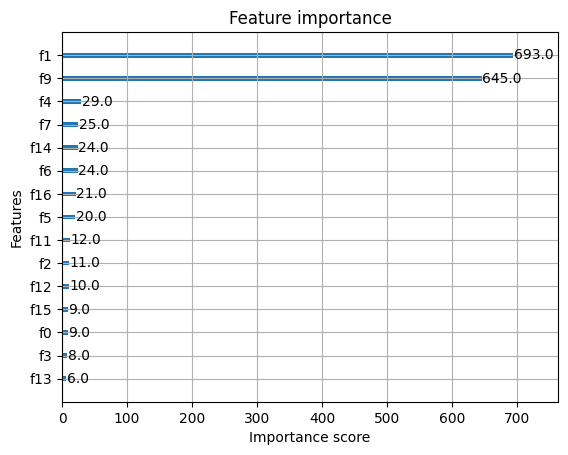

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Get the best XGBoost model from the trained models
xgb_model = best_models['XGBoost']

# Get feature importances
feature_importances = xgb_model.feature_importances_

feature_names = ['Age Group Targeted', 'price', 'platform', 'Requires Special Device', 'developer', 'publisher', 'Release Year', 'genre', 'multiplayer', 'Game Length Hours', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode', 'Min Number of Players', 'Overall Quality', 'Review_Sentiment']


# Create a DataFrame of feature importances with feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
n_top_features = 15 # Number of top features to display

ax = xgb.plot_importance(xgb_model, max_num_features=n_top_features) # Use the best model directly

yticks_locs = ax.get_yticks()

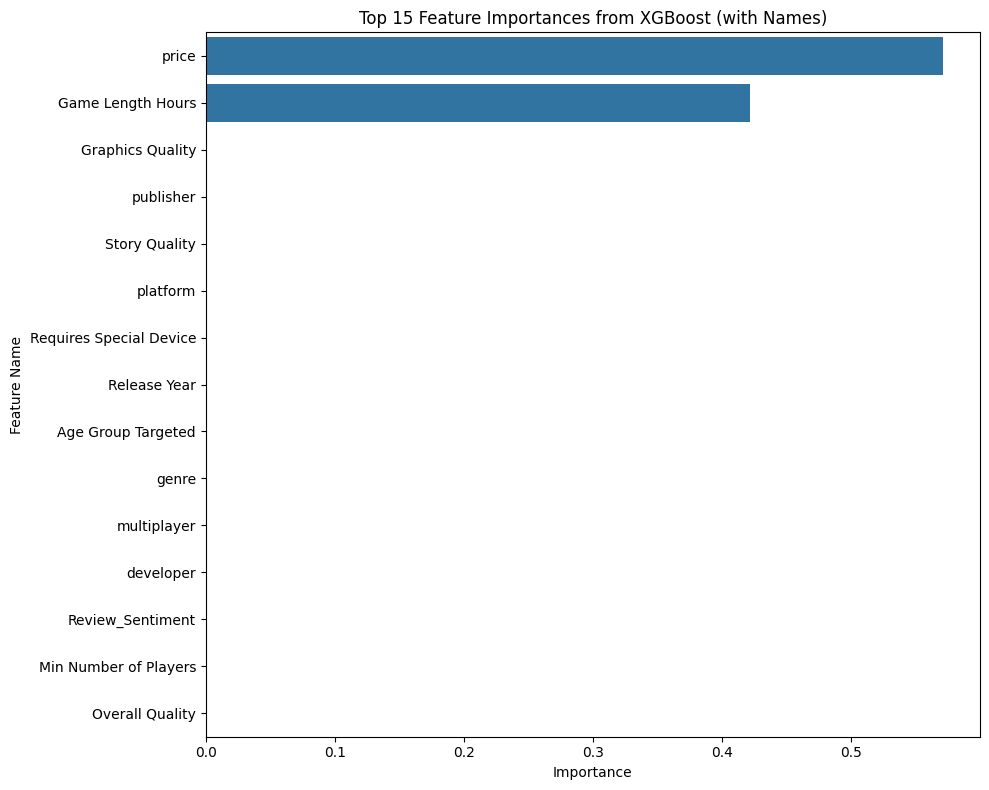

In [ ]:
top_feature_names = importance_df.head(n_top_features)['Feature'].tolist()

# Now, create the plot using matplotlib/seaborn with the correct names
plt.figure(figsize=(10, 8)) # New figure for the seaborn plot with names
sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features), orient='h')

plt.title(f'Top {n_top_features} Feature Importances from XGBoost (with Names)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [ ]:
print("\nTop Feature Importances (with Names):")
display(importance_df.head(n_top_features))


Top Feature Importances (with Names):


,Feature,Importance
1,price,0.571167
9,Game Length Hours,0.421282
10,Graphics Quality,0.000709
5,publisher,0.000599
12,Story Quality,0.000562
2,platform,0.000541
3,Requires Special Device,0.000520
6,Release Year,0.000519
0,Age Group Targeted,0.000506
7,genre,0.000502


## As we can see above, Only 'Price' and 'Game Length Hours' heavily affected the training, while the rest are not existent/observed according to the models.
### Hence indicates a clear linear relationship from these numerical features with User Ratings.

# 6.5. Model Deployment

In [ ]:
import joblib

# Get the trained Linear Regression model from the best_models dictionary
best_model_of_all = best_models['Linear Regression']

# Define the filename to save the model
filename = 'best_model.joblib'

# Save the model to a file
joblib.dump(best_model_of_all, filename)

print(f"Linear Regression model saved to {filename}")

Linear Regression model saved to best_model.joblib


#--------------------------------------------------The End---------------------------------------------------

# # Github preparation
preparing libraries required to install for anyone who wants to use this notebook.

In [ ]:
!pip freeze > requirements.txt